In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import tensorflow as tf

# Regresion Logistica V1

In [2]:
# Cargar el dataset de Iris
#es un dataset donde se da las dimensiones del sépalo y el pétalo como x
#y se tienen tres tipos de flores como target (0,1,2)->(setosa, versicolor, virginica)

#Se carga el dataset
iris = datasets.load_iris()
#se tranforma el target de 0,1,2 a 0,1
binary_target = np.array([1.0 if x == 0 else 0.0 for x in iris.target])
#se toma sólo largo y ancho de los pétalos 
iris_2d = np.array([[x[2], x[3]] for x in iris.data])

#Valores de los hiperparametros
batch_size = 20
learning_rate=0.1

In [3]:
#Divide en training y test

#saca los id del conjunto de training 80% y de test 20%
train_2d = np.random.choice(len(iris_2d), size=round(len(iris_2d)*0.8),replace=False)
test_2d = np.array(list(set(range(len(iris_2d)))-set(train_2d)))

x_vals_train = iris_2d[train_2d]
x_vals_test = iris_2d[test_2d]
y_vals_train = binary_target[train_2d].reshape(-1,1)
y_vals_test = binary_target[test_2d].reshape(-1,1).reshape(30,1)

El modelo:
$$x_2 = Ax_1+b \Rightarrow x_2-Ax_1-b=0$$

In [4]:
# Definir variables y modelo
class LogisticModel(tf.Module):
    def __init__(self):
        self.A = tf.Variable(tf.random.normal(shape=[1, 1], dtype=tf.float32), name='A')
        self.b = tf.Variable(tf.random.normal(shape=[1, 1], dtype=tf.float32), name='b')
    
    def __call__(self, x2_data):
        return tf.add(tf.matmul(x2_data, self.A), self.b)

model = LogisticModel()


In [5]:
# Definir la pérdida y el optimizador
def loss_fn(model, x1_data, x2_data, y_target):
    my_prediction = tf.subtract(x1_data, model(x2_data))
    xentropy = tf.nn.sigmoid_cross_entropy_with_logits(logits=my_prediction, labels=y_target)
    return tf.reduce_mean(xentropy)

optimizer = tf.optimizers.SGD(learning_rate=learning_rate)

In [6]:
def train_step(model, x1_data, x2_data, y_target):
    with tf.GradientTape() as tape:
        loss = loss_fn(model, x1_data, x2_data, y_target)
    gradients = tape.gradient(loss, [model.A, model.b])
    optimizer.apply_gradients(zip(gradients, [model.A, model.b]))

for i in range(5000):
    rand_idx = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = x_vals_train[rand_idx]
    rand_x1 = np.array([[x[0]] for x in rand_x], dtype=np.float32)
    rand_x2 = np.array([[x[1]] for x in rand_x], dtype=np.float32)
    rand_y = np.array([y for y in y_vals_train[rand_idx]], dtype=np.float32)
    train_step(model, rand_x1, rand_x2, rand_y)
    if (i + 1) % 500 == 0:
        print('Paso #' + str(i + 1) + ", A=" + str(model.A.numpy()[0][0]) + ", b=" + str(model.b.numpy()[0][0]))


Paso #500, A=6.0940704, b=-1.4623506
Paso #1000, A=7.29144, b=-2.4440165
Paso #1500, A=8.0498085, b=-3.088797
Paso #2000, A=8.661314, b=-3.5023963
Paso #2500, A=9.135886, b=-3.8590097
Paso #3000, A=9.524442, b=-4.1562285
Paso #3500, A=9.874043, b=-4.3973165
Paso #4000, A=10.190929, b=-4.599868
Paso #4500, A=10.433543, b=-4.829406
Paso #5000, A=10.676223, b=-4.999605


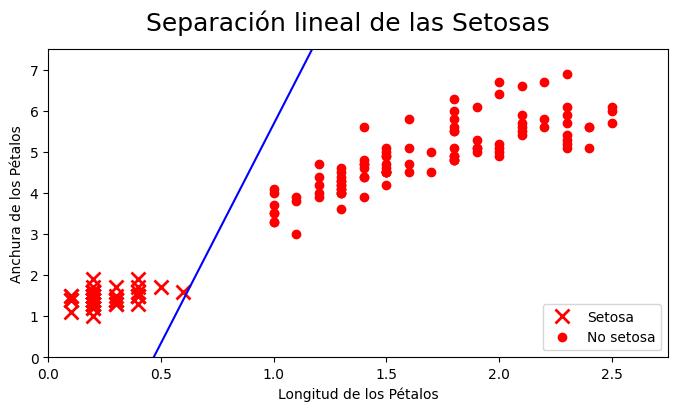

In [7]:
# Obtener la línea de separación
slope = model.A.numpy()[0][0]
intercept = model.b.numpy()[0][0]

x = np.linspace(0, 3, num=100)
abline_values = slope * x + intercept

setosa_x = [a[1] for i, a in enumerate(iris_2d) if binary_target[i] == 1]
setosa_y = [a[0] for i, a in enumerate(iris_2d) if binary_target[i] == 1]

no_setosa_x = [a[1] for i, a in enumerate(iris_2d) if binary_target[i] == 0]
no_setosa_y = [a[0] for i, a in enumerate(iris_2d) if binary_target[i] == 0]

plt.figure(figsize=(8, 4))
plt.plot(setosa_x, setosa_y, 'rx', ms=10, mew=2, label='Setosa')
plt.plot(no_setosa_x, no_setosa_y, 'ro', label="No setosa")
plt.plot(x, abline_values, 'b-')
plt.suptitle('Separación lineal de las Setosas', fontsize=18)
plt.xlabel("Longitud de los Pétalos")
plt.ylabel("Anchura de los Pétalos")
plt.legend(loc="lower right")
plt.xlim([0, 2.75])
plt.ylim([0, 7.5])
plt.show()


# Evaluación del modelo

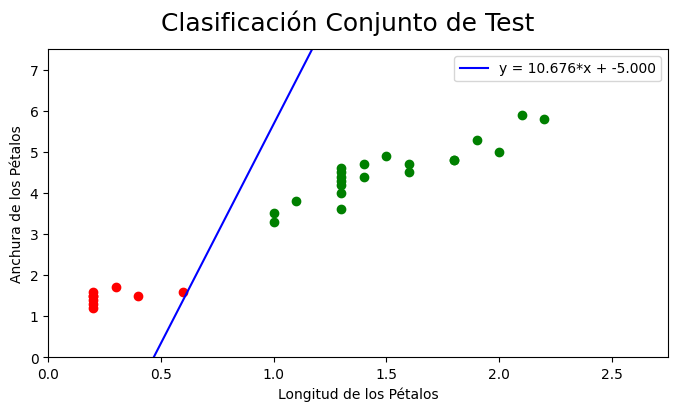

Clasificación de puntos (1 = Setosa, 0 = No Setosa): [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [8]:
#Clasificaciond del consjunto de test

x_vals = x_vals_test[:,1]
y_vals = x_vals_test[:,0]

#saca los valores de A y B del modelo
A = round(model.A.numpy()[0][0],3)
b = round(model.b.numpy()[0][0],3)


# Lista para clasificar los puntos
y_pred = []

# Clasificación de los puntos
for x, y in zip(x_vals, y_vals):
    y_recta = A * x + b
    if y > y_recta:
        y_pred.append(1)  # A la derecha de la recta
    else:
        y_pred.append(0)  # A la izquierda de la recta


plt.figure(figsize=(8, 4))
# Plot de la recta
x_line = np.linspace(min(x_vals), max(x_vals), 10)
y_line = A * x_line + b
plt.plot(x_line, y_line, 'b-', label=f'y = {A:.3f}*x + {b:.3f}')


# Plot de los puntos clasificados
for x, y, c in zip(x_vals, y_vals, y_pred):
    color = 'r' if c == 1 else 'g'
    plt.scatter(x, y, color=color)

# Etiquetas y leyenda
plt.suptitle('Clasificación Conjunto de Test', fontsize=18)
plt.xlabel("Longitud de los Pétalos")
plt.ylabel("Anchura de los Pétalos")
plt.legend(loc="lower right")
plt.xlim([0, 2.75])
plt.ylim([0, 7.5])
plt.legend()
plt.show()

# Imprimir la clasificación
print("Clasificación de puntos (1 = Setosa, 0 = No Setosa):", y_pred)

In [9]:
#Comprobacion del resultado - Matriz de confucion
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_vals_test, y_pred)
cm

array([[21,  0],
       [ 0,  9]], dtype=int64)